_* How to use networkx API *_

https://networkx.github.io/documentation/networkx-1.10/index.html

# Assign. 1 - Creating and Manipulating Graphs

Eight people were asked to choose 3 movies that they would most enjoy watching for the upcoming movie night. These choices are stored in the file `Movie_Choices.txt`.

A second file, `Relationships.txt`, has data on the relationships between different people. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two people haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite

# This is the set of people
people = set(['Pablo',
              'Lee',
              'Georgia',
              'Vincent',
              'Andy',
              'Frida',
              'Joan',
              'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(14,8))
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights)
    else:
        nx.draw_networkx(G, pos, edges=edges)
        
        
def plot_bi_graph(G):
    
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(14,8))
    
    nodecolor = []
    for node in G.nodes():
        temp = 'red' if node in people else 'aqua'
        nodecolor.append(temp)
    
    X, Y = bipartite.sets(G)
    pos = dict()
    pos.update( (n, (1, i+2)) for i, n in enumerate(X) ) # put nodes from X at x=1
    pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
    plt.axis('off')
    
    nx.draw_networkx(G, pos=pos, node_color=nodecolor)

### Question 1

Using NetworkX, load in the bipartite graph from `Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [2]:
def answer_one():
    
    df = pd.read_csv('Movie_Choices.txt', delimiter='\\t', names=['Employee', 'Movie'], header=0)
    #df_dict = {k: g["Movie"].tolist() for k,g in df.groupby("Employee")}
    
    B = nx.from_pandas_dataframe(df, 'Employee', 'Movie')
    B.add_nodes_from(people, bipartite=0)
    B.add_nodes_from(movies, bipartite=1)
    
    return B

In [3]:
Q1 = answer_one()

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
Q1.nodes(data=True)

[('Andy', {'bipartite': 0}),
 ('Anaconda', {'bipartite': 1}),
 ('Mean Girls', {'bipartite': 1}),
 ('The Matrix', {'bipartite': 1}),
 ('Claude', {'bipartite': 0}),
 ('Monty Python and the Holy Grail', {'bipartite': 1}),
 ('Snakes on a Plane', {'bipartite': 1}),
 ('Frida', {'bipartite': 0}),
 ('The Shawshank Redemption', {'bipartite': 1}),
 ('The Social Network', {'bipartite': 1}),
 ('Georgia', {'bipartite': 0}),
 ('Joan', {'bipartite': 0}),
 ('Forrest Gump', {'bipartite': 1}),
 ('Kung Fu Panda', {'bipartite': 1}),
 ('Lee', {'bipartite': 0}),
 ('Pablo', {'bipartite': 0}),
 ('The Dark Knight', {'bipartite': 1}),
 ('Vincent', {'bipartite': 0}),
 ('The Godfather', {'bipartite': 1})]

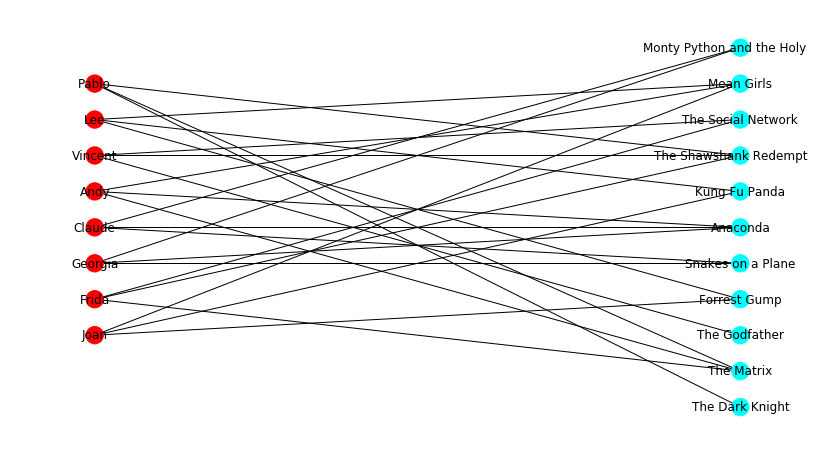

In [5]:
plot_bi_graph(Q1)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and people have the value `'person'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'person}`*

In [6]:
def answer_two():
    
    B = answer_one()
    
    for person in people :
        B.add_node(person, type = 'person')
    
    for movie in movies :
        B.add_node(movie, type = 'movie')
    
    return B

In [7]:
Q2 = answer_two()

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
Q2.nodes(data=True)

[('Andy', {'bipartite': 0, 'type': 'person'}),
 ('Anaconda', {'bipartite': 1, 'type': 'movie'}),
 ('Mean Girls', {'bipartite': 1, 'type': 'movie'}),
 ('The Matrix', {'bipartite': 1, 'type': 'movie'}),
 ('Claude', {'bipartite': 0, 'type': 'person'}),
 ('Monty Python and the Holy Grail', {'bipartite': 1, 'type': 'movie'}),
 ('Snakes on a Plane', {'bipartite': 1, 'type': 'movie'}),
 ('Frida', {'bipartite': 0, 'type': 'person'}),
 ('The Shawshank Redemption', {'bipartite': 1, 'type': 'movie'}),
 ('The Social Network', {'bipartite': 1, 'type': 'movie'}),
 ('Georgia', {'bipartite': 0, 'type': 'person'}),
 ('Joan', {'bipartite': 0, 'type': 'person'}),
 ('Forrest Gump', {'bipartite': 1, 'type': 'movie'}),
 ('Kung Fu Panda', {'bipartite': 1, 'type': 'movie'}),
 ('Lee', {'bipartite': 0, 'type': 'person'}),
 ('Pablo', {'bipartite': 0, 'type': 'person'}),
 ('The Dark Knight', {'bipartite': 1, 'type': 'movie'}),
 ('Vincent', {'bipartite': 0, 'type': 'person'}),
 ('The Godfather', {'bipartite': 1, '

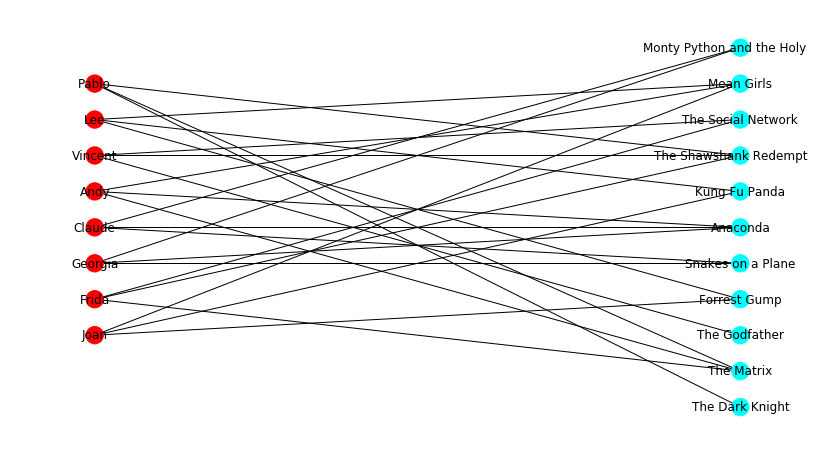

In [9]:
plot_bi_graph(Q2)

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of people have in common.

*This function should return a weighted projected graph.*

In [10]:
def answer_three(X):
    
    B = answer_two()    
    G = bipartite.weighted_projected_graph(B,X)
    
    return G

In [11]:
Q3 = answer_three(people)

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
Q3.nodes(data=True)

[('Joan', {'bipartite': 0, 'type': 'person'}),
 ('Georgia', {'bipartite': 0, 'type': 'person'}),
 ('Frida', {'bipartite': 0, 'type': 'person'}),
 ('Claude', {'bipartite': 0, 'type': 'person'}),
 ('Andy', {'bipartite': 0, 'type': 'person'}),
 ('Vincent', {'bipartite': 0, 'type': 'person'}),
 ('Lee', {'bipartite': 0, 'type': 'person'}),
 ('Pablo', {'bipartite': 0, 'type': 'person'})]

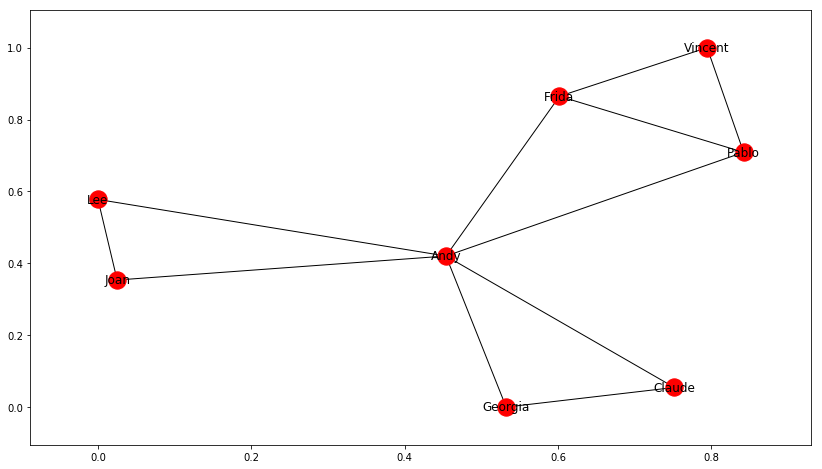

In [13]:
plot_graph(Q3)

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between people relationship scores and the number of movies they have in common. If two people have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [16]:
def answer_four():
        
    PB = answer_three(people)
    df1 = nx.to_pandas_dataframe(PB)
    df2 = pd.read_table('Relationships.txt', header = None, names = ['n1', 'n2', 'score'])
    df2['shared_movies'] = df1.lookup(df2['n1'], df2['n2'])
    result = df2.loc[:,['score', 'shared_movies']].corr().iloc[0,1]
    print(df1)
    print('=================================================================')
    print(df2)
    
    return result

In [17]:
answer_four()

         Joan  Georgia  Frida  Claude  Andy  Vincent  Lee  Pablo
Joan      0.0      0.0    0.0     0.0   1.0      0.0  3.0    0.0
Georgia   0.0      0.0    0.0     3.0   1.0      0.0  0.0    0.0
Frida     0.0      0.0    0.0     0.0   1.0      2.0  0.0    2.0
Claude    0.0      3.0    0.0     0.0   1.0      0.0  0.0    0.0
Andy      1.0      1.0    1.0     1.0   0.0      0.0  1.0    1.0
Vincent   0.0      0.0    2.0     0.0   0.0      0.0  0.0    1.0
Lee       3.0      0.0    0.0     0.0   1.0      0.0  0.0    0.0
Pablo     0.0      0.0    2.0     0.0   1.0      1.0  0.0    0.0
         n1       n2  score  shared_movies
0      Andy   Claude      0            1.0
1      Andy    Frida     20            1.0
2      Andy  Georgia    -10            1.0
3      Andy     Joan     30            1.0
4      Andy      Lee    -10            1.0
5      Andy    Pablo    -10            1.0
6      Andy  Vincent     20            0.0
7    Claude    Frida      0            0.0
8    Claude  Georgia     90 

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


0.78839622217334759